Exploring Yijie gene list.

In [37]:
%reload_ext autoreload
%autoreload 1

In [151]:
# imports
import pandas as pd
from io import StringIO
from IPython.display import Image, IFrame
import qgrid

In [133]:
# set display options
pd.options.display.max_columns = 999

# Data Munging

In [13]:
# import the worksheet
df = pd.read_excel('../../data/yijie/TFlist_for_genes.xlsx', sheetname='fru', header=None)
df.columns = ['symbol', 'weight']

In [14]:
# sort vlaus by weight
df.sort_values('weight', inplace=True)

Merge on FBgn for easy comparison across gene lists. The easiest way to do this is use FlyBase's (FB) batch download utility. 

I copied and pasted gene symbols into the FB Batch download and selected:

* field data
* as tab-separated file
* send results to: Browser
* selected the fields: Name and FlyBaseID

I then copied and pasted these results and replace tabs with commas.

This is Yijie's list with FBgn and name added.

In [29]:
# Use flybase data to make table with fbgn and names
fbdat = StringIO("""SUBMITTED ID,FBID_KEY,NAME
CG7099,FBgn0032517,-
fru,FBgn0004652,fruitless
HP1b,FBgn0030082,Heterochromatin Protein 1b
CG7987,FBgn0038244,-
shn,FBgn0003396,schnurri
CG6689,FBgn0037877,-
tgo,FBgn0264075,tango
CG8089,FBgn0033993,-
CG3065,FBgn0034946,-
gem,FBgn0050011,gemini
Hr51,FBgn0034012,Hormone receptor 51
Nipped-A,FBgn0053554,Nipped-A
CG18476,FBgn0037931,-
CG12942,FBgn0033569,-
CG7357,FBgn0038551,-
CG12391,FBgn0033581,-
Rtf1,FBgn0034722,Rtf1
CycC,FBgn0004597,Cyclin C
HmgD,FBgn0004362,High mobility group protein D
CG8159,FBgn0037619,-
CrebB,FBgn0265784,Cyclic-AMP response element binding protein B
CG4820,FBgn0037876,-
Trf2,FBgn0261793,TATA box binding protein-related factor 2
CG9305,FBgn0032512,-
Df31,FBgn0022893,Decondensation factor 31
hng3,FBgn0035160,hinge3
Myb,FBgn0002914,Myb oncogene-like
key,FBgn0041205,kenny
Crg-1,FBgn0021738,Circadianly Regulated Gene""")

df2 = pd.read_csv(fbdat)
df2.columns = ['symbol', 'FBgn', 'name']

In [125]:
qgrid.QGridWidget(df=df2.set_index('FBgn')).export()

# Fruitless Binding Motifs

From a previous paper we identified male isoforms of fruitless (FruM) binding motifs throughout the genome using SELEX. 

[PMID: 24074028](http://www.ncbi.nlm.nih.gov/pubmed?cmd=search&term=24074028)

I have binding data for the three protein binding domains (see panel B of Figure below). This is not a perfect metric because the FruM binding motif is really common, but a good start.

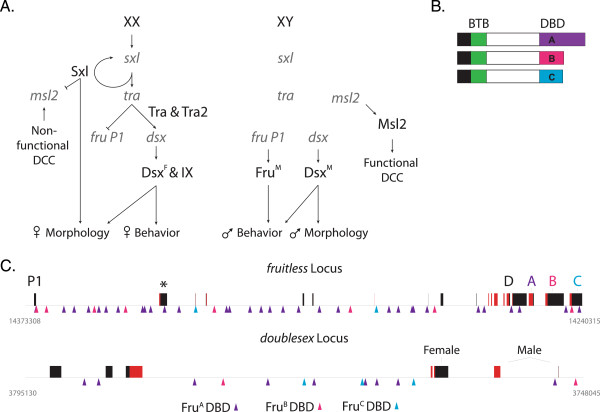

In [52]:
Image('https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3852243/bin/1471-2164-14-659-1.jpg')

In [53]:
fruBS = pd.read_excel('https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3852243/bin/1471-2164-14-659-S4.xlsx')
fruBS = fruBS[['FBgn', 'FruA DBD Motif', 'FruB DBD Motif', 'FruC DBD Motif']].drop(0)

In [127]:
merged = df2.merge(fruBS, on='FBgn')
qgrid.QGridWidget(df=merged.set_index('FBgn')).export()

In order to do enrichment analysis I would need to have the list of expressed genes, but sense this is a quick look I would say that *schnurri* and *Nipped-A* are both strong candidates for being targeted by Fru. The *fru* locus itself also contains a lot of FruM binding sites.

# Differential Expression

From this same study we also induced FruM{A, B, C} overexpression in P1-neurons (i.e., adult heads). Again not an ideal comparison for S2 cells, but still useful to look at. the below table has binary flags (0, 1) for if a gene was induced (increase expression) or repressed (decreased expression) when over expressing FruM{A, B, C} in P1-neruons. We were very conservative and used an FDR cutoff and required >=2-fold change.

In [134]:
# FruMA
fruMADiff = pd.read_excel('https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3852243/bin/1471-2164-14-659-S1.xlsx', sheetname='FruMA Male 2-fold', skip_rows=2)
fruMADiff.columns = ['FBgn', 'symbol']

# This shee contains coloring to represent induced and repressed. I am going to add a binary flag.
fruMADiff['FruMA_induced'] = 0
fruMADiff.loc[:752, 'FruMA_induced'] = 1

fruMADiff['FruMA_repressed'] = 0
fruMADiff.loc[753:, 'FruMA_repressed'] = 1

# FruMB
fruMBDiff = pd.read_excel('https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3852243/bin/1471-2164-14-659-S1.xlsx', sheetname='FruMB Male 2-fold', skip_rows=2)
fruMBDiff.columns = ['FBgn', 'symbol']

# This shee contains coloring to represent induced and repressed. I am going to add a binary flag.
fruMBDiff['FruMB_induced'] = 0
fruMBDiff.loc[:739, 'FruMB_induced'] = 1

fruMBDiff['FruMB_repressed'] = 0
fruMBDiff.loc[740:, 'FruMB_repressed'] = 1

# FruMC
fruMCDiff = pd.read_excel('https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3852243/bin/1471-2164-14-659-S1.xlsx', sheetname='FruMC Male 2-fold', skip_rows=2)
fruMCDiff.columns = ['FBgn', 'symbol']

# This shee contains coloring to represent induced and repressed. I am going to add a binary flag.
fruMCDiff['FruMC_induced'] = 0
fruMCDiff.loc[:927, 'FruMC_induced'] = 1

fruMCDiff['FruMC_repressed'] = 0
fruMCDiff.loc[928:, 'FruMC_repressed'] = 1

# Merge them all together
merged = df2.merge(fruMADiff[['FBgn', 'FruMA_induced', 'FruMA_repressed']], on='FBgn').merge(fruMBDiff[['FBgn', 'FruMB_induced', 'FruMB_repressed']], on='FBgn').merge(fruMCDiff[['FBgn', 'FruMC_induced', 'FruMC_repressed']], on='FBgn')

For comparison the total number of genes incuded or repressed are below.

In [148]:
pd.DataFrame(pd.concat([fruMADiff[['FruMA_induced', 'FruMA_repressed']].sum(), 
                        fruMBDiff[['FruMB_induced', 'FruMB_repressed']].sum(), 
                        fruMCDiff[['FruMC_induced', 'FruMC_repressed']].sum()]),
            columns=['count'])

,count
FruMA_induced,753
FruMA_repressed,204
FruMB_induced,740
FruMB_repressed,259
FruMC_induced,928
FruMC_repressed,295


Only *fru* and *schnurri* were found to be differential expressed. However, the cutoffs are conservative and this is adult heads.

In [131]:
qgrid.QGridWidget(df=merged.set_index('FBgn')).export()

# Other Network Information

Next I wanted to look at http://genemania.org which has some nice network representations from different types of data. Edges are colored by the type of data (e.g. co-expresison, predicted interactions, genetic interactions, co-localization, physical interactions, shared domains). First I looked at the *fru* network. However, none of the other genes in the list are in this network.

In [161]:
# Fru network
IFrame('http://genemania.org/link?o=7227&g=fru', 900,900)

Next I give genemania the gene list. Here genes from Yijie's list are large and hashed circles. Most of the relationships are co-expression patterns (pink lines). In this network *fru* is related to *Df31* expression patterns. *Df31* in turn is co-expressed/co-localized with a number of genes from the list. Not surprisingly this would indicate that some of the relationships we are seeing in the gene list are a potentially indirect effects.

In [159]:
# Gene list network
IFrame('http://genemania.org/link?o=7227&g={genes}'.format(genes='|'.join(df2['FBgn'].tolist())), 1000,900)